#Task 2

###The task involves performing a binary classification on the "Type" column, which is present in "table_2.csv".The goal is to classify the "Type" column (which contains values 'n' and 't') into two categories, likely representing a binary outcome (e.g., 0 and 1)

Approach : To do this 1. merge the tables using the "ID" column and use the features from both tables to train a classification model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os

In [ ]:
# Load the datasets
table1 = pd.read_csv('/content/drive/MyDrive/BMW_csv_files/table_1.csv', sep=';')
table2 = pd.read_csv('/content/drive/MyDrive/BMW_csv_files/table_2.csv', sep=';')

In [ ]:
table1.head()

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq


In [ ]:
table2.head()

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
0,1,1.750,0,t,f,uuuu,t,n,17.92
1,0,0.290,1,f,f,wwww,f,n,16.92
2,1,0.000,2,f,f,wwww,t,n,31.25
3,0,0.335,3,f,f,uuuu,f,n,48.17
4,0,0.500,4,t,f,wwww,f,n,32.33


In [ ]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4070 non-null   int64  
 1   UKL     4070 non-null   int64  
 2   GJAH    4006 non-null   object 
 3   ZIK     1705 non-null   object 
 4   HUI     4070 non-null   object 
 5   ERZ     4006 non-null   object 
 6   CDx     4070 non-null   float64
 7   BJZHD   4004 non-null   object 
 8   NKJUD   3966 non-null   float64
 9   LPI     3966 non-null   float64
 10  BJKG    4004 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 349.9+ KB


In [ ]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POUG    4070 non-null   int64  
 1   TRE     4070 non-null   float64
 2   ID      4070 non-null   int64  
 3   ZUB     4070 non-null   object 
 4   VOL     4070 non-null   object 
 5   UIO     4027 non-null   object 
 6   VBNM    4070 non-null   object 
 7   Type    4070 non-null   object 
 8   OIN     4028 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 286.3+ KB


In [ ]:
# Merge the tables on 'ID'
merged_data = pd.merge(table1, table2, on='ID', how='inner')

In [ ]:
merged_data.head()

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,n,17.92
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
2,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
3,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,n,31.25
4,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,n,48.17


In [ ]:
merged_data['Type'].value_counts()

,count
Type,
y,4135
n,340


In [ ]:
# Map 'Type' to binary labels (e.g., 'n' = 0, 't' = 1)
merged_data['Type'] = merged_data['Type'].map({'n': 0, 'y': 1})

In [ ]:
merged_data['Type'].value_counts()

,count
Type,
1,4135
0,340


In [ ]:
# Define features (X) and target (y)
features = merged_data.drop(columns=['ID', 'Type'])  # Exclude 'ID' and 'Type'
target = merged_data['Type']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3580, 17)
(895, 17)
(3580,)
(895,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (e.g., those with 'oooo', 'www', etc.)
categorical_cols = X_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Ensure all columns are numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
X_train = X_train.fillna(0)  # Replace NaN with 0, or use mean/median
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)  # Ensure no NaN in target

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.004801  0.002318 -0.000026  0.000252  0.003369  0.001006  0.011193   

              7             8         9       10        11        12  \
0 -6.277985e-12 -6.277972e-08  0.007693  0.00995  0.008977  0.000677   

         13        14        15        16  intercept  
0  0.002662  0.002291  0.001378  0.050566   0.001351  


In [ ]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9273743016759777


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


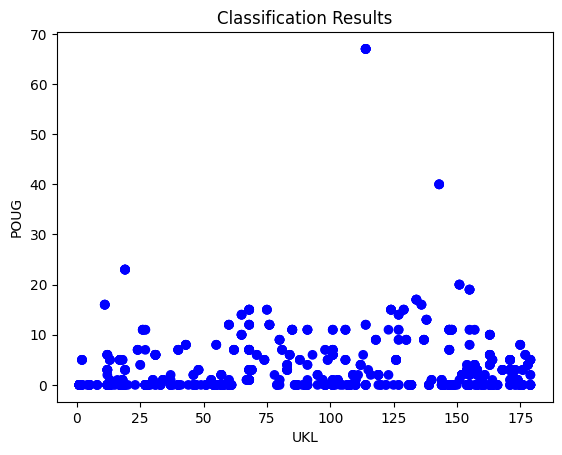

In [ ]:
# Visualize the data (e.g., using a simple scatter plot)
import matplotlib.pyplot as plt
plt.scatter(X_test['UKL'], X_test['POUG'], c=y_pred, cmap='bwr')
plt.xlabel('UKL')
plt.ylabel('POUG')
plt.title('Classification Results')
plt.show()

In [ ]:
# I will come back to focus on data preprocessing, model selection, and computational efficiency.
# Also I will try replacing LogisticRegression with other models (e.g., DecisionTreeClassifier) from scikit-learn for comparison.
# If time permits then i would like to do EDA and missing value imputation.

Speed: One-hot encoding and vectorized operations are faster than loops with LabelEncoder.
Accuracy: Hyperparameter tuning and cross-validation provide a more reliable model.
Scalability: Downcasting and alternative models improve performance on larger datasets.
